In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creando Modelo de Regresión Lineal
<p>Importamos las lobrerias correspondientes</p>

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data_diabetes = datasets.load_diabetes()
data_diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
print(data_diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
XD = data_diabetes.data
YD = data_diabetes.target

In [6]:
YD

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [7]:
XD.shape, YD.shape

((442, 10), (442,))

# Cargar Dataset + crear matriz X e Y

In [8]:
XD, YD = datasets.load_diabetes(return_X_y=True)
XD.shape, YD.shape

((442, 10), (442,))

# Data Split
<p>Para esto importaremos la libreria train_test_split de sklearn</p>

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
XD_train, XD_test, YD_train, YD_test = train_test_split(XD, YD, test_size=0.2) 

In [11]:
XD_train.shape, YD_train.shape

((353, 10), (353,))

In [12]:
XD_test.shape, YD_test.shape

((89, 10), (89,))

# Entrenameinto del Modelo

In [13]:
modelo_D = linear_model.LinearRegression()
modelo_D.fit(XD_train, YD_train)

LinearRegression()

In [14]:
XD_test.shape

(89, 10)

### Predicciones sobre los datos de prueba

In [15]:
predicciones = modelo_D.predict(XD_test)

### Recta de regresion

In [16]:
recta_regresion = modelo_D.coef_ * XD_test + modelo_D.intercept_

### Grafica de los datos de prueba, las predicciones y la recta de regresión

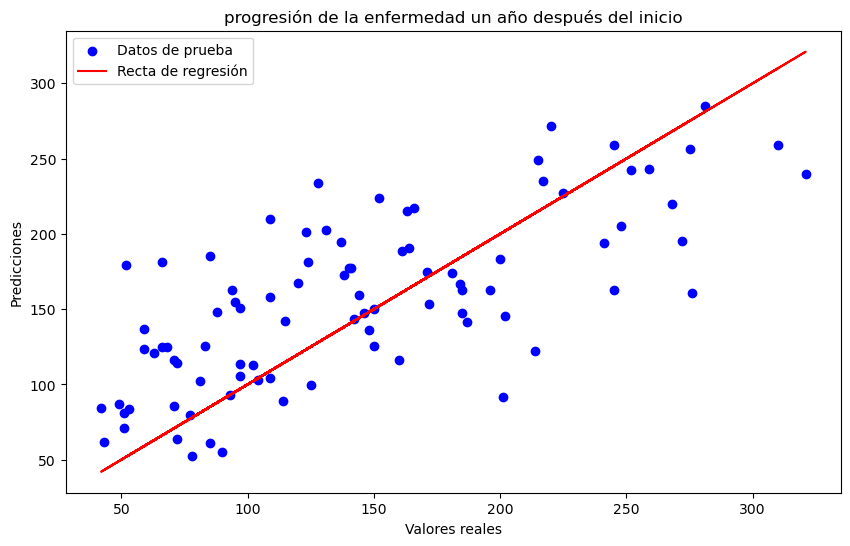

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(YD_test, predicciones, color='blue', label='Datos de prueba')
plt.plot(YD_test, YD_test, color='red', label='Recta de regresión')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title("progresión de la enfermedad un año después del inicio")
plt.legend()
plt.show()

In [43]:
nuevo_valor_X = np.random.uniform(-0.5, 0.5, size=(1, XD.shape[1]))
prediccion_nuevo_valor = modelo_D.predict(nuevo_valor_X)
prediccion_nuevo_valor

array([190.25035515])

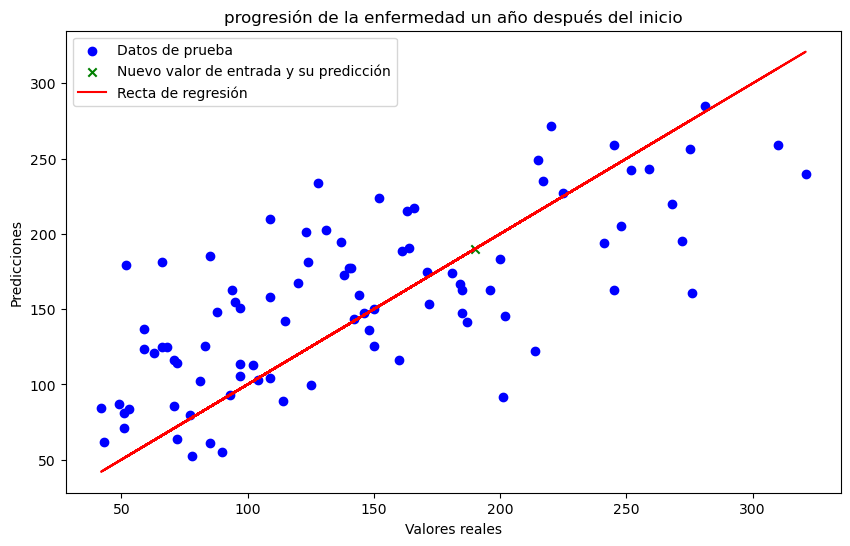

In [44]:

plt.figure(figsize=(10, 6))
plt.scatter(YD_test, predicciones, color='blue', label='Datos de prueba')
plt.scatter(prediccion_nuevo_valor, prediccion_nuevo_valor, marker='x',color='green', label='Nuevo valor de entrada y su predicción')
plt.plot(YD_test, YD_test, color='red', label='Recta de regresión')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title("progresión de la enfermedad un año después del inicio")
plt.legend()
plt.show()

# Entrenamiento para modelo del dataset BostonHousing

In [20]:
data_housing = pd.read_csv('BostonHousing.csv')
data_housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Variable Y es la llamada "medv"
<p>Asignamos a Y la variable medv</p>
<p>Todas las demas corresponderan a la variable X</p>

In [21]:
Y = data_housing.medv
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [22]:
X = data_housing.drop(['medv'], axis = 1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [23]:
X.shape, Y.shape

((506, 13), (506,))

<p>Definimos la proporcion entre los datos que seran entrenados y cuales no, en este ejemplo se usara el 50% de los datos para el entrenamiento</p>

In [24]:
#Se asignan los valores correspondientes a las variabñes
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

<p>Verificamos la dimencionalidad de los datos</p>

In [25]:
X_train.shape, Y_train.shape

((404, 13), (404,))

In [26]:
X_test.shape, Y_test.shape

((102, 13), (102,))

In [27]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
111,0.10084,0.0,10.01,0,0.547,6.715,81.6,2.6775,6,432,17.8,395.59,10.16
105,0.13262,0.0,8.56,0,0.520,5.851,96.7,2.1069,5,384,20.9,394.05,16.47
59,0.10328,25.0,5.13,0,0.453,5.927,47.2,6.9320,8,284,19.7,396.90,9.22
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,14.23620,0.0,18.10,0,0.693,6.343,100.0,1.5741,24,666,20.2,396.90,20.32
368,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26
129,0.88125,0.0,21.89,0,0.624,5.637,94.7,1.9799,4,437,21.2,396.90,18.34
95,0.12204,0.0,2.89,0,0.445,6.625,57.8,3.4952,2,276,18.0,357.98,6.65


<p>Se puede apreciar que, sumando "Train" y "Test" se obtine la dimencionalidad original de los datos</p>

## Se define el modelo de regresion Lineal

In [28]:
model = linear_model.LinearRegression()

## Construir Modelo de entrenamiento

In [29]:
model.fit(X_train, Y_train)

LinearRegression()

In [30]:
## Aplicar Modelo para las predicciones

In [31]:
Y_pred = model.predict(X_test)

In [32]:
print('Coefficients:', model.coef_)

Coefficients: [-4.74303334e-02  3.85646204e-02 -1.05301730e-02  3.53368589e+00
 -1.79168303e+01  4.00674960e+00 -8.01650714e-03 -1.54371351e+00
  2.26932862e-01 -9.64894845e-03 -9.04612008e-01  1.16174378e-02
 -5.09930300e-01]


In [33]:
print('Intercept:', model.intercept_)

Intercept: 34.12400094133943


In [34]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Error cuadratico medio:", mse)
print("R^2:", r2)


Error cuadratico medio: 23.15276376874689
R^2: 0.6892314994795901


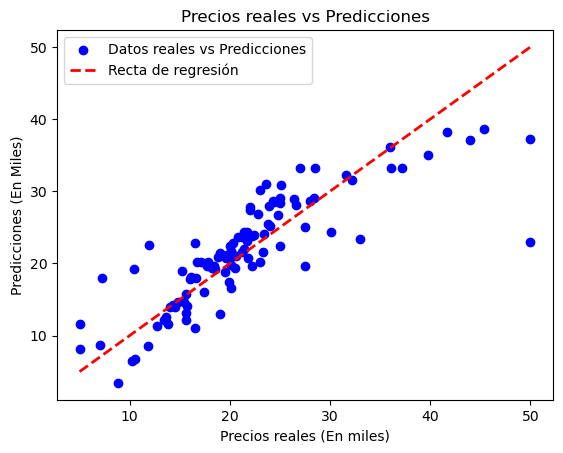

In [35]:
# Valores reales  (test) y las predicciones
plt.scatter(Y_test, Y_pred, color='blue', label='Datos reales vs Predicciones')

# Recta de regresión
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', linewidth=2, label='Recta de regresión')

plt.xlabel("Precios reales (En miles)")
plt.ylabel("Predicciones (En Miles)")
plt.title("Precios reales vs Predicciones")
plt.legend()
plt.show()

### Nuevo Valor de X a predecir

In [36]:
nuevos_X = np.random.uniform(low=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                                 high=[10, 1, 30, 2, 1, 10, 100, 5, 50, 1000, 30, 500, 30], 
                                 size=(1, 13))
nuevos_X

array([[ 4.4145726 ,  0.15976889, 26.0971093 ,  0.41538224,  0.28601267,
         9.32021265, 18.35684558,  4.45332326, 18.91925593, 57.84407673,
        25.45488538, 93.77092707,  9.55888971]])

#### Pasamos la nueva X al modelo para realizar la prediccion

In [37]:
Y_predic = model.predict(nuevos_X)

C:\Users\caray\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


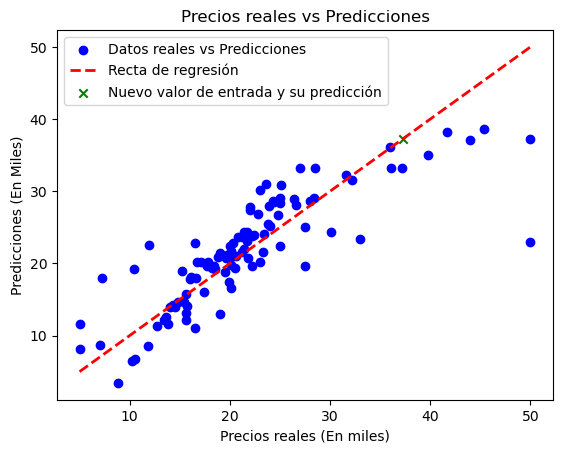

In [38]:
# Valores reales y las predicciones
plt.scatter(Y_test, Y_pred, color='blue', label='Datos reales vs Predicciones')
# Plot de la recta de regresión
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', linewidth=2, label='Recta de regresión')
# Nuevo Valor de X a predecir
plt.scatter(Y_predic, Y_predic, marker='x',color='green', label='Nuevo valor de entrada y su predicción')
plt.xlabel("Precios reales (En miles)")
plt.ylabel("Predicciones (En Miles)")
plt.title("Precios reales vs Predicciones")
plt.legend()
plt.show()